## Data acquisition

In [1]:
from bs4 import BeautifulSoup
import requests
import json
import twint
import nest_asyncio
nest_asyncio.apply()


In [8]:

# Configure scraper
config = twint.Config()
config.Limit = 6000
config.Search = '#blacklivesmatter'
config.Store_json = True
config.Hide_output = True
config.Output = "../" + "data/dataset.json"

The following retreive the **#blacklivesmatter** data , we execute it only once : uncomment if you want to run it again

In [11]:
#twint.run.Search(config)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


## Data cleaning

Given than none of my teammate and me didn't get access to a developper account, we acquire the data using web srapping. Thanks to the package named Twint for twiter data scraping, we extract some data related the hashtag #blacklivesmatter, that we store in a json file. Then we clean and analyse the data before creating our graph

In [1]:
#We import the packages and read our json file
import pandas as pd
import json


tweets=list()
with open("../data/dataset.json", 'r', encoding='utf-8') as file:
    for line in file:
        tweets.append(json.loads(line))

In [2]:
len(tweets)

3831

In [3]:
#We print the first tweet using pprint
from pprint import pprint
pprint(tweets[0])

{'cashtags': [],
 'conversation_id': '1488889960790999046',
 'created_at': '2022-02-02 16:00:03 Maroc (heure d’été)',
 'date': '2022-02-02',
 'geo': '',
 'hashtags': ['blackhistorymonth', 'blacklivesmatter', 'blackcanada'],
 'id': 1488889960790999046,
 'language': 'en',
 'likes_count': 0,
 'link': 'https://twitter.com/black_buildup/status/1488889960790999046',
 'mentions': [],
 'name': 'Black Buildup',
 'near': '',
 'photos': ['https://pbs.twimg.com/media/FKka1_TVkAAdxhK.jpg',
            'https://pbs.twimg.com/media/FKkb6PpUcAAjhQn.jpg'],
 'place': '',
 'quote_url': '',
 'replies_count': 0,
 'reply_to': [],
 'retweet': False,
 'retweet_date': '',
 'retweet_id': '',
 'retweets_count': 0,
 'source': '',
 'thumbnail': 'https://pbs.twimg.com/media/FKka1_TVkAAdxhK.jpg',
 'time': '16:00:03',
 'timezone': '+0100',
 'trans_dest': '',
 'trans_src': '',
 'translate': '',
 'tweet': "February is #BlackHistoryMonth in Canada! We'll be hosting events "
          'every Friday of this month along wi

In [4]:
# we create a list with the pairs (username1, username2)

list_pairs = list()

for tweet in tweets:
    user_mentions = tweet["mentions"]
    if user_mentions:
        for user in user_mentions:
            list_pairs.append((tweet["name"], user["name"], tweet["tweet"], tweet["created_at"]))

In [5]:
#  Create a Dataframe of your usernames, content and day of the tweet
graph_data = pd.DataFrame.from_records(list_pairs, columns=["from", "to", "body", "day"])

In [6]:
graph_data.head()

,from,to,body,day
0,William Spivey,signal,Why Racism Has Never Been Fixed in America | b...,2022-02-02 15:54:43 Maroc (heure d’été)
1,Sally,phoenix police,EVERY ARTICLE NEEDS TO REFER TO THE @PhoenixPo...,2022-02-02 15:49:51 Maroc (heure d’été)
2,Marshall Toburen,kcmo talk radio,@PeteMundo @kcmotalkradio @PeteMundo on @kcmo...,2022-02-02 15:46:25 Maroc (heure d’été)
3,M. Stark,nia langley✨,"I live for these. Thank you, @theNiaLangley! ...",2022-02-02 15:39:13 Maroc (heure d’été)
4,MilqueToast,twitter,@JustinTrudeau I think anyone who actively and...,2022-02-02 15:37:00 Maroc (heure d’été)


In [7]:
#We Create a frequency column for each pair of username using the groupby method

graph_data_freq = graph_data.groupby(['from', 'to']).size().reset_index()
graph_data_freq.columns = ["from", "to", "freq"]

In [8]:
graph_data_freq.tail(20)

,from,to,freq
726,⚔️ Pokimane Supporter ⚔️,🇸🇴 warya warrior,1
727,✊🏿DeafBlind Inclusion Creates Prosperity🌺😷,nationalactionnet,1
728,✊🏿DeafBlind Inclusion Creates Prosperity🌺😷,"official nbda, inc.",1
729,✊🏿DeafBlind Inclusion Creates Prosperity🌺😷,rev jesse jackson sr,1
730,✊🏿DeafBlind Inclusion Creates Prosperity🌺😷,reverend al sharpton,1
731,✨ Sale Threads ✨,black visions,1
732,𝗧𝗵𝗲 𝗣𝗼𝘁𝗲𝗻𝘁𝗶𝗮𝗹,my name is muni,1
733,🍊👉 👀 🌎🔥 👈 #FJB,citizen free press,1
734,🍊👉 👀 🌎🔥 👈 #FJB,dan le batard show with stugotz,1
735,🍊👉 👀 🌎🔥 👈 #FJB,espn,1


## Creation and analysis of the network

At this point, you have a Dataframe with 3 columns 'from', 'to' and 'frequency' that we will use to create our network using the package networks. Then we are going to calculate a few metrics for macro-level and micro-level analysis of the graph.

In [9]:
import networkx as nx
g = nx.from_pandas_edgelist(graph_data_freq, source='from', target="to", edge_attr='freq', create_using=nx.Graph())

In [10]:
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 986\nNumber of edges: 746\nAverage degree:   1.5132'

In [11]:
nx.density(g)

0.001536228004242131

In [12]:
nx.algorithms.average_clustering(g)

0.0

In [13]:
nx.connected.is_connected(g)

False

In [14]:
degree_df = pd.DataFrame.from_dict(dict(nx.degree(g, weight='freq')), orient= "index")
degree_df.reset_index(inplace=True)
degree_df.columns = ["node", "degree"]

In [15]:
degree_df.sort_values('degree', ascending=False)

,node,degree
26,youtube,30
104,Aron Seal,27
913,etsy,21
912,joanandmi,21
512,Marsha,19
...,...,...
389,Guy Smith,1
390,wake county public school system,1
392,ma democratic party,1
393,npr,1


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='degree', ylabel='Density'>

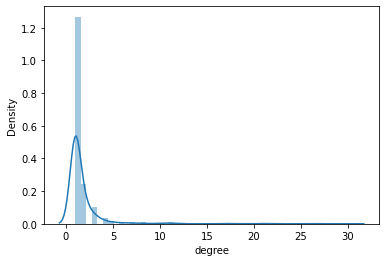

In [16]:
import seaborn as sns
sns.distplot(degree_df["degree"])

In [17]:
nx.degree_centrality(g)

{'#CalCare #AB1400 #SaveSolar #FreedomToVoteAct': 0.0010152284263959391,
 'aclu california action': 0.0010152284263959391,
 '#Judy Votes Blue 🇺🇸': 0.0010152284263959391,
 'mr. ernest crim iii': 0.0010152284263959391,
 '#LUHG🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f🇳🇱 On loan at Sevilla': 0.003045685279187817,
 'anti guadalajara fan🇲🇽': 0.0010152284263959391,
 '🇲🇽🇬🇧': 0.0010152284263959391,
 '🇲🇽🦍': 0.0010152284263959391,
 '#NFT Chicago #BlackHistoryMonth #blacklifematters': 0.0010152284263959391,
 '#nft chicago': 0.0010152284263959391,
 '#VOTEGOPOUT': 0.003045685279187817,
 'cnn': 0.0020304568527918783,
 'fox news': 0.0010152284263959391,
 'msnbc': 0.0020304568527918783,
 '(((a. quant)))': 0.003045685279187817,
 'abc': 0.0010152284263959391,
 'the view': 0.003045685279187817,
 'whoopi goldberg': 0.006091370558375634,
 'AC Advertiser': 0.0020304568527918783,
 'lanarkshirelive': 0.0010152284263959391,
 'northlancouncil': 0.0010152284263959391,
 'AIQ_node ⚙️': 0.0030456

In [18]:
nx.betweenness_centrality(g)

{'#CalCare #AB1400 #SaveSolar #FreedomToVoteAct': 0.0,
 'aclu california action': 0.0,
 '#Judy Votes Blue 🇺🇸': 0.0,
 'mr. ernest crim iii': 0.0,
 '#LUHG🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f🇳🇱 On loan at Sevilla': 6.190417234121579e-06,
 'anti guadalajara fan🇲🇽': 0.0,
 '🇲🇽🇬🇧': 0.0,
 '🇲🇽🦍': 0.0,
 '#NFT Chicago #BlackHistoryMonth #blacklifematters': 0.0,
 '#nft chicago': 0.0,
 '#VOTEGOPOUT': 0.0010503074573892947,
 'cnn': 0.00035285378234493003,
 'fox news': 0.0,
 'msnbc': 0.0013866534604432337,
 '(((a. quant)))': 4.814768959872339e-05,
 'abc': 0.0,
 'the view': 6.534329302683889e-05,
 'whoopi goldberg': 0.0001000784119516322,
 'AC Advertiser': 2.06347241137386e-06,
 'lanarkshirelive': 0.0,
 'northlancouncil': 0.0,
 'AIQ_node ⚙️': 0.0007036440922784862,
 'reuters': 0.0,
 'the associated press': 0.0,
 'undisputed': 0.001046180512566547,
 'ANTHRONAUTS.com': 0.0,
 'youtube': 0.0009450703644092278,
 'ANoelleJay, Alicia Noelle J.': 0.0,
 'anoellejay, alicia noelle j.': 

To get a better view of our graph, we create a drowing of it, first using the basis "draw" fonction of networks and matplotlib and a layout

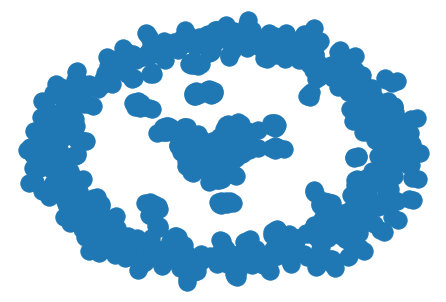

In [19]:
# Draw your network using draw fonction
nx.draw(g)

In [20]:
import matplotlib.pyplot as plt

In [21]:
layout = nx.kamada_kawai_layout(g)

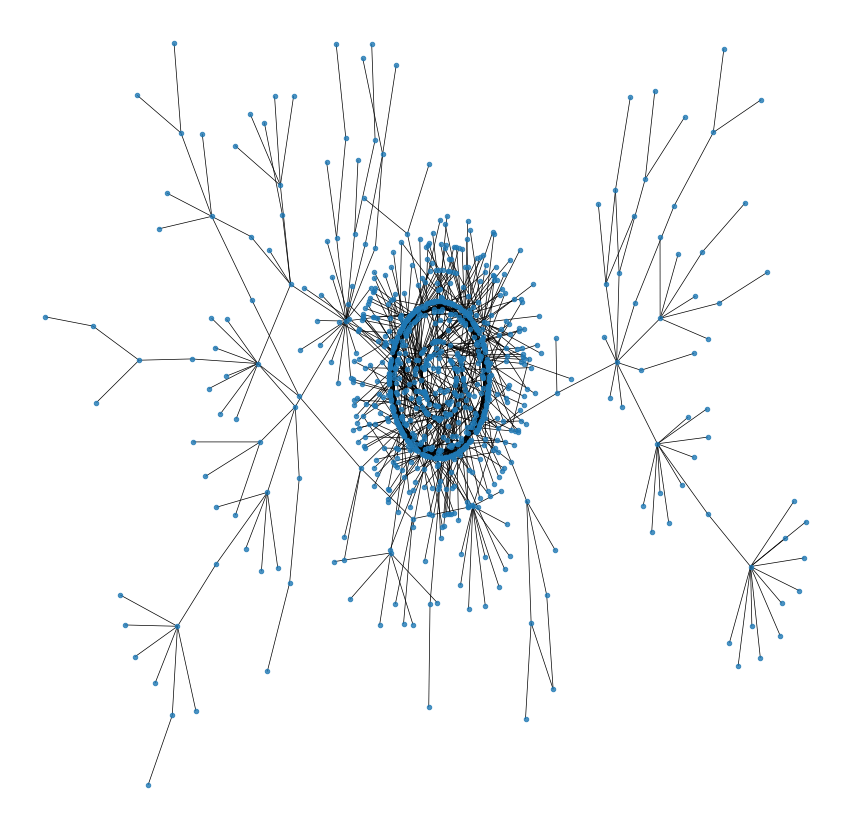

In [22]:
#Drawing of the graph using the kamada_kawai_layout layout 

plt.figure(figsize=(15,15))
plt.axis("off")
nx.draw_networkx_nodes(g, pos=layout, node_size=20, alpha=0.8)
nx.draw_networkx_edges(g, pos=layout, width=0.7, edge_color='Black')
plt.show()

###### Here we perform a community detection using the Louvain Community Detection package the we visualize the network with nodes colored according to their communities

In [23]:
import community
partitions = community.best_partition(g)

In [24]:
partitions

{'#CalCare #AB1400 #SaveSolar #FreedomToVoteAct': 0,
 'aclu california action': 0,
 '#Judy Votes Blue 🇺🇸': 1,
 'mr. ernest crim iii': 1,
 '#LUHG🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f🇳🇱 On loan at Sevilla': 2,
 'anti guadalajara fan🇲🇽': 2,
 '🇲🇽🇬🇧': 2,
 '🇲🇽🦍': 2,
 '#NFT Chicago #BlackHistoryMonth #blacklifematters': 3,
 '#nft chicago': 3,
 '#VOTEGOPOUT': 28,
 'cnn': 28,
 'fox news': 28,
 'msnbc': 28,
 '(((a. quant)))': 5,
 'abc': 5,
 'the view': 5,
 'whoopi goldberg': 5,
 'AC Advertiser': 6,
 'lanarkshirelive': 6,
 'northlancouncil': 6,
 'AIQ_node ⚙️': 65,
 'reuters': 65,
 'the associated press': 65,
 'undisputed': 65,
 'ANTHRONAUTS.com': 8,
 'youtube': 8,
 'ANoelleJay, Alicia Noelle J.': 9,
 'anoellejay, alicia noelle j.': 9,
 'AUC3I': 10,
 '4blmchicago': 10,
 'aaihs': 10,
 'african & black history': 10,
 'blackhistorystudies': 10,
 'blackstudentsmatter': 10,
 'blmchicago': 10,
 'rainbowpushcoalition': 10,
 'the chicago defender': 10,
 'the final call news': 10,
 

In [25]:
partitions_df = pd.DataFrame.from_dict(partitions, orient='index').reset_index()

In [26]:
partitions_df.columns = ["node", "affiliation"]

In [27]:
partitions_df.value_counts("affiliation")

affiliation
69     52
8      36
28     32
65     31
35     26
       ..
125     2
126     2
129     2
130     2
262     2
Length: 263, dtype: int64

In [28]:
values_aff = list(partitions_df.affiliation)

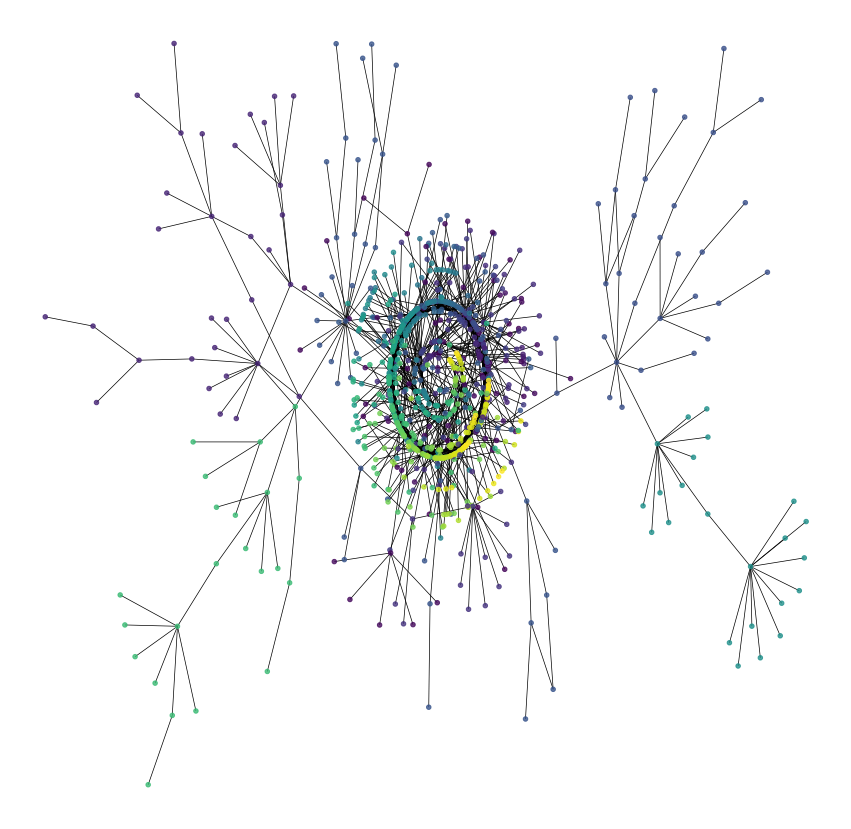

In [29]:
plt.figure(figsize=(15,15))
plt.axis("off")
nx.draw_networkx_nodes(g, pos=layout, node_size=20, alpha=0.8, node_color=values_aff)
nx.draw_networkx_edges(g, pos=layout, width=0.7, edge_color='Black')
plt.show()

In [30]:
community.modularity(partitions, g)

0.9697142579907899